<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/67_nbhn_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
%%capture
!pip install py7zr pyogrio

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch
import py7zr

In [ ]:
nbhn_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/geonb_nbhn.geojson.7z',
    known_hash='7d5d247e247cc3734c7c184dc9420ea264609f520702cc194c364b446b94981c'
)

with py7zr.SevenZipFile(nbhn_file) as archive:
    archive.extractall()

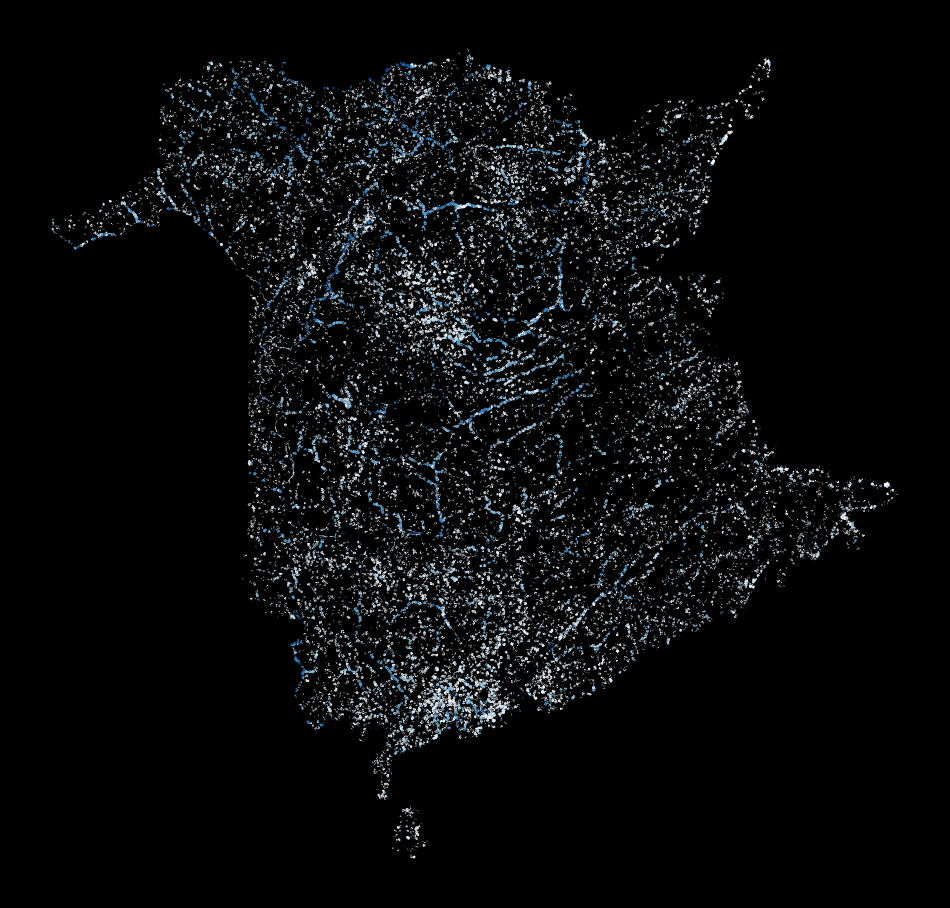

In [ ]:
nbhn = gpd.read_file('geonb_nbhn.geojson', engine='pyogrio', use_arrow=True)
nbhn['width'] = (10 - nbhn.STREAMORDE) / 5.0
f, ax = plt.subplots(1, 1, figsize=(12, 15))
nbhn.query('SHAPE_Leng < 250').plot(column='STREAMORDE', ax=ax, linewidth=nbhn['width'], cmap='Blues')
f.patch.set_facecolor('black')
ax.axis('off');